In [ ]:
# import of needed librairies
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings

# Ignorer tous les warnings
warnings.filterwarnings('ignore')


In [ ]:
#define filepath for our dataset

#base_dir=os.getcwd()

test_dir= "Data/Testing"
train_dir= 'Data/Training'

train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)
print(train_classes)
print(test_classes)





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from collections import Counter

# Create the ImageDataGenerators with normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to [0, 1]
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize pixel values to [0, 1]
)

# Train generator with binary labels
train_generator = train_datagen.flow_from_directory(
    'Data/Training',  # Replace with your actual training directory path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Change from 'categorical' to 'binary'
)

# Test/Validation generator with binary labels
test_generator = test_datagen.flow_from_directory(
    'Data/Testing',  # Replace with your actual testing directory path
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'  # Change from 'categorical' to 'binary'
)

# Initialize counters
train_counts = Counter()
test_counts = Counter()

# Function to count class occurrences
def count_class_occurrences(generator, counts):
    for _ in range(len(generator)):
        _, labels = next(generator)  # Get the next batch
        labels = labels.flatten()
        for label in labels:
            class_label = int(label)
            counts[class_label] += 1

# Count occurrences in the training data
count_class_occurrences(train_generator, train_counts)

# Count occurrences in the testing data
count_class_occurrences(test_generator, test_counts)

# Convert counts to lists for plotting
class_names = ['notumor', 'tumor']  # Assuming binary classes

train_counts_list = [train_counts.get(0, 0), train_counts.get(1, 0)]
test_counts_list = [test_counts.get(0, 0), test_counts.get(1, 0)]

# Print the number of images in each class
print("Training Data Class Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {train_counts_list[i]} images")

print("\nTesting Data Class Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {test_counts_list[i]} images")

# Plot the class distribution for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(class_names, train_counts_list, color=['blue', 'orange'])
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Plot the class distribution for testing data
plt.subplot(1, 2, 2)
plt.bar(class_names, test_counts_list, color=['blue', 'orange'])
plt.title('Testing Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


In [ ]:
model = tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Binary classification output layer with 1 unit and sigmoid activation
    Dense(1, activation='sigmoid')
])

model.summary()

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [27]:
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    
    # Saving model checkpoints during training (monitoring validation accuracy)
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True),
    
    # Adjusting learning rates dynamically
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
]

# Training the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.7636 - loss: 0.5398 - val_accuracy: 0.8863 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 685s 4s/step - accuracy: 0.9427 - loss: 0.1685 - val_accuracy: 0.9260 - val_loss: 0.1887 - learning_rate: 0.0010
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 708s 4s/step - accuracy: 0.9586 - loss: 0.1200 - val_accuracy: 0.9390 - val_loss: 0.1523 - learning_rate: 0.0010
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 759s 4s/step - accuracy: 0.9659 - loss: 0.1041 - val_accuracy: 0.9397 - val_loss: 0.1353 - learning_rate: 0.0010
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 697s 4s/step - accuracy: 0.9665 - loss: 0.0868 - val_accuracy: 0.9375 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 702s 4s/step - accuracy: 0.9774 - loss: 0.0738 - val_accuracy: 0.9115 - val_loss: 0.1713 - learning_rate: 0.0010
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.9738 - loss: 0.

In [28]:
model.save('LargeTraining-V2.keras')

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,395,973 (32.03 MB)

 Trainable params: 2,798,657 (10.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,597,316 (21.35 MB)

21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9890 - loss: 0.0248
Test Loss: 0.02842637710273266
Test Accuracy: 0.9847444891929626


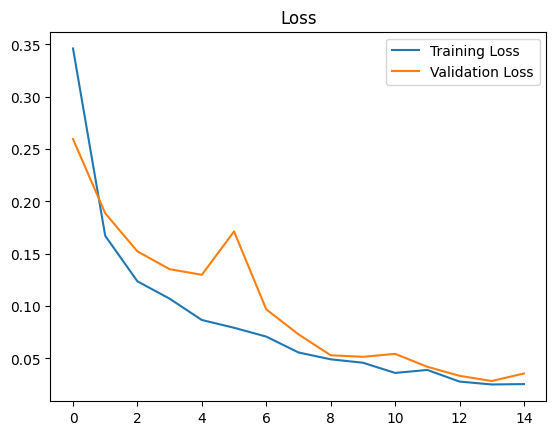

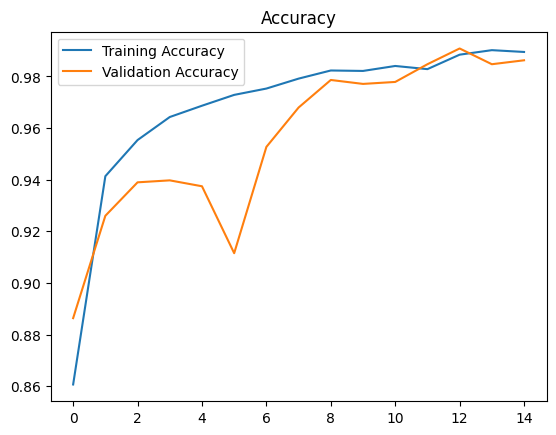

In [30]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")

print(f"Test Accuracy: {test_accuracy}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('resnetV3.keras')  # Replace with your actual model path

# Directory structure
test_dir = 'Test'  # Replace with the actual path to the testing directory

# Image target size (must match the input size of the model)
target_size = (224, 224)  # Adjust this to match your model's expected input size

# Initialize counters
correct_predictions = 0
incorrect_predictions = 0
total_images = 0

# Function to make a prediction for a single image
def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=target_size)  # Load and resize image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Predict the class
    prediction = model.predict(img_array)
    return (prediction > 0.5).astype(int)  # Convert prediction to binary label

# Loop over testing directories and images
for category in ['tumor', 'notumor']:
    category_dir = os.path.join(test_dir, category)
    print(f"Checking directory: {category_dir}")  # Add a print to debug directory path
    if not os.path.exists(category_dir):
        print(f"Directory {category_dir} not found.")
        continue

    for filename in os.listdir(category_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            image_path = os.path.join(category_dir, filename)
            try:
                predicted_label = predict_image_class(image_path)
                actual_label = 1 if category == 'tumor' else 0

                # Update counters
                total_images += 1
                if predicted_label[0][0] == actual_label:  # Fix shape mismatch issue
                    correct_predictions += 1
                else:
                    incorrect_predictions += 1

                # Print the result for the current image
                print(f"Image: {filename} | Actual: {'tumor' if actual_label == 1 else 'notumor'} | Predicted: {'tumor' if predicted_label[0][0] == 1 else 'notumor'}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")
                continue

# Print summary
print(f"\nTotal Images: {total_images}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")

accuracy_percentage = (correct_predictions / total_images) * 100

print("Accuracy is : ", accuracy_percentage)


Checking directory: Test\tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Image: G_1.jpg | Actual: tumor | Predicted: tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image: G_10.jpg | Actual: tumor | Predicted: tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Image: G_11.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image: G_12.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image: G_13.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: G_14.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: G_15.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: G_16.jpg | Actual: tumor | Predicted: tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: G_17.jpg | Actual: tumor | Predicted: tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Image: G_18.jpg | Actual: tumor | Predicted: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Image: G_19.jpg | Actual: tu

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('LargeTraining-V2.keras')  # Replace with your actual model path

# Image target size (must match the input size of the model)
target_size = (224, 224)  # Adjust this to match your model's expected input size

# Function to make a prediction for a single image
def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=target_size)  # Load and resize image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Predict the class
    prediction = model.predict(img_array)
    print(prediction.shape)

    return (prediction > 0.5).astype(int)  # Convert prediction to binary label

# Specify the image path and actual label
image_path = 'Data/Testing/tumor/Te-gl_0013.jpg'  # Replace with the actual path to your image

# Make the prediction
predicted_label = predict_image_class(image_path)

# Check if the prediction is correct
if predicted_label[0][0] == 1:
    print("Tumor")
else:
    print("No tumor")


ModuleNotFoundError: No module named 'tensorflow'